In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,log_loss 
import matplotlib.pyplot as plt

In [2]:
cancer=pd.read_csv('BreastCancer.csv',index_col=0)

In [3]:
cancer

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...
1369821,10,10,10,10,5,10,10,10,7,Malignant
1371026,5,10,10,10,4,10,5,6,3,Malignant
1371920,5,1,1,1,2,1,3,2,1,Benign


In [4]:
le=LabelEncoder()

In [5]:
cancer['Class']=le.fit_transform(cancer['Class'])

In [6]:
X=cancer.drop('Class',axis=1)
y=cancer['Class']

In [7]:
rf=RandomForestClassifier(random_state=23)

In [8]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 23,
 'verbose': 0,
 'warm_start': False}

In [9]:
params={'max_features':[3,4,5,6]}

In [10]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [11]:
gcv_rf=GridSearchCV(rf,param_grid=params,cv=kfold,scoring='neg_log_loss')

In [12]:
gcv_rf.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_features': [3, 4, 5, 6]}, scoring='neg_log_loss')

In [13]:
gcv_rf.best_params_

{'max_features': 3}

In [14]:
gcv_rf.best_score_

-0.1008663596688781

In [15]:
bm_rf=gcv_rf.best_estimator_

In [16]:
df_imp=pd.DataFrame({'variable':bm_rf.feature_names_in_,'importance':bm_rf.feature_importances_})

In [17]:
df_imp=df_imp[df_imp['importance']>0.0001]
df_imp=df_imp.sort_values(by='importance')

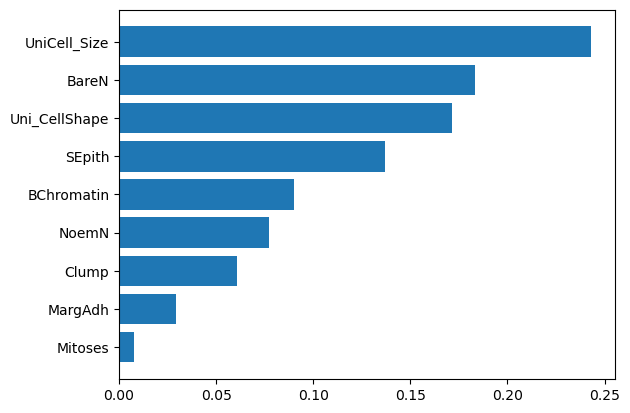

In [18]:
plt.barh(df_imp.variable,df_imp.importance)
plt.show()

# decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtc=DecisionTreeClassifier(random_state=23)

In [20]:
params={'max_depth':[2,3,4,5,6,None],'min_samples_leaf':[1,3,5,7,10,15],'min_samples_split': [2,5,10]}

In [21]:
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')

In [22]:
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss')

In [23]:
gcv.best_params_

{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [24]:
gcv.best_score_

-0.2456110095055712

In [25]:
best_model=gcv.best_estimator_

In [26]:
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_ ,'importance':best_model.feature_importances_})
df_imp

,variable,importance
0,Clump,0.000000
1,UniCell_Size,0.886462
2,Uni_CellShape,0.079546
3,MargAdh,0.000000
4,SEpith,0.000000
5,BareN,0.000000
6,BChromatin,0.033991
7,NoemN,0.000000
8,Mitoses,0.000000


In [27]:
df_imp=df_imp[df_imp['importance']>0.0001]
df_imp=df_imp.sort_values(by="importance")
df_imp

,variable,importance
6,BChromatin,0.033991
2,Uni_CellShape,0.079546
1,UniCell_Size,0.886462


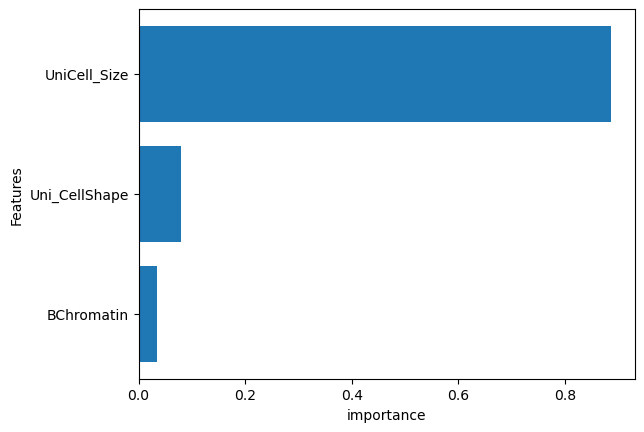

In [28]:
plt.barh(df_imp['variable'],df_imp['importance'])
plt.xlabel("importance")
plt.ylabel('Features')
plt.show()

In [29]:
from joblib import dump
dump(best_model,"rf.joblib")

['rf.joblib']